In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_Shopee_XpressRELEVANT.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_jnt_cargo_NESWEST.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_POS_Indo_RELEVANT.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_Ninja_MOST_RELEVANT.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_jne_NESWEST.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_SICEPAT_MOST_RELEVANT.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/tiki_scraping.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_Sentral_cargo_MOST_RELEVANT.csv
/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/anteraja_scraping.csv
/kaggle/input/df-final-play-store/df_final_play_store.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
shopee_xpress = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_Shopee_XpressRELEVANT.csv')
jnt_cargo = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_jnt_cargo_NESWEST.csv')
pos_indo = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_POS_Indo_RELEVANT.csv')
ninja = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_Ninja_MOST_RELEVANT.csv')
jne = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_jne_NESWEST.csv')
sicepat = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_SICEPAT_MOST_RELEVANT.csv')
sentral_cargo = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/scrapped_Sentral_cargo_MOST_RELEVANT.csv')
tiki = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/tiki_scraping.csv')
anteraja = pd.read_csv('/kaggle/input/play-store-jasa-pengiriman/RAW DATA SCRAPING/anteraja_scraping.csv')

In [7]:
csv_files = [shopee_xpress, jnt_cargo, pos_indo, ninja, jne, sicepat, sentral_cargo, tiki, anteraja]

for file in csv_files:
    #f"This {file} has shape {file.shape}"
    print('this file has shape:', file.shape)

this file has shape: (1000, 11)
this file has shape: (972, 11)
this file has shape: (5955, 11)
this file has shape: (335, 11)
this file has shape: (398, 11)
this file has shape: (24, 11)
this file has shape: (353, 11)
this file has shape: (4019, 11)
this file has shape: (1000, 11)


### Check dataset columns

In [9]:
for file in csv_files:
    print(file.info())
    print("*****"*10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              1000 non-null   object 
 1   userName              1000 non-null   object 
 2   userImage             1000 non-null   object 
 3   content               1000 non-null   object 
 4   score                 1000 non-null   int64  
 5   thumbsUpCount         1000 non-null   int64  
 6   reviewCreatedVersion  826 non-null    object 
 7   at                    1000 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            826 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 11 columns):
 #   Co

### Shopee xpress (understand the dataset better)

In [10]:
shopee_xpress.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2f32ba1f-31e8-405e-8b66-5f5e25812954,Junaidi,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya sangat kecewa dengan para pelanggan spx e...,5,0,4.0.4,2023-10-01 12:53:22,NaN,NaN,4.0.4
1,3f4baab6-1292-423a-8cdd-6fe0b7c70790,Fabian Alden game and tutorial,https://play-lh.googleusercontent.com/a-/ALV-U...,Bintang satu dulu tunggu barang sampai moga ku...,1,0,4.0.4,2023-10-01 07:49:17,NaN,NaN,4.0.4
2,54a891dd-1507-4fe2-94cd-bdfb44ab2fed,Evan Junior,https://play-lh.googleusercontent.com/a/ACg8oc...,Keeren,5,0,NaN,2023-10-01 05:28:13,NaN,NaN,NaN
3,7073a22c-6371-4261-82ae-010f592d55bd,Adnan Patoni,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus sekarang sudah lumayan ada peningkatan o...,5,0,1.1.7,2023-10-01 02:54:07,NaN,NaN,1.1.7
4,21e4731b-870d-4383-abd0-89ed5369991c,Nofrizal Chand,https://play-lh.googleusercontent.com/a-/ALV-U...,🙏👍🙏👍🙏👍👍👍👍,5,0,4.0.4,2023-10-01 01:35:01,NaN,NaN,4.0.4


In [11]:
shopee_xpress['score'].value_counts()

score
1    644
5    280
4     35
2     26
3     15
Name: count, dtype: int64

In [13]:
shopee_xpress.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     174
at                         0
replyContent            1000
repliedAt               1000
appVersion               174
jenis_ekspedisi            0
dtype: int64

In [34]:
shopee_xpress.duplicated().sum()

0

In [12]:
# Add a new column 'jenis_ekspedisi' according to the csv file origin
shopee_xpress['jenis_ekspedisi'] = 'shopee-express'
shopee_xpress.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,jenis_ekspedisi
0,2f32ba1f-31e8-405e-8b66-5f5e25812954,Junaidi,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya sangat kecewa dengan para pelanggan spx e...,5,0,4.0.4,2023-10-01 12:53:22,NaN,NaN,4.0.4,shopee_express
1,3f4baab6-1292-423a-8cdd-6fe0b7c70790,Fabian Alden game and tutorial,https://play-lh.googleusercontent.com/a-/ALV-U...,Bintang satu dulu tunggu barang sampai moga ku...,1,0,4.0.4,2023-10-01 07:49:17,NaN,NaN,4.0.4,shopee_express
2,54a891dd-1507-4fe2-94cd-bdfb44ab2fed,Evan Junior,https://play-lh.googleusercontent.com/a/ACg8oc...,Keeren,5,0,NaN,2023-10-01 05:28:13,NaN,NaN,NaN,shopee_express
3,7073a22c-6371-4261-82ae-010f592d55bd,Adnan Patoni,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus sekarang sudah lumayan ada peningkatan o...,5,0,1.1.7,2023-10-01 02:54:07,NaN,NaN,1.1.7,shopee_express
4,21e4731b-870d-4383-abd0-89ed5369991c,Nofrizal Chand,https://play-lh.googleusercontent.com/a-/ALV-U...,🙏👍🙏👍🙏👍👍👍👍,5,0,4.0.4,2023-10-01 01:35:01,NaN,NaN,4.0.4,shopee_express


In [15]:
# only take important columns in the shopee_xpress df
selected_shopee_xpress = shopee_xpress[['content', 'score', 'jenis_ekspedisi']]
selected_shopee_xpress

,content,score,jenis_ekspedisi
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee_express
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee_express
2,Keeren,5,shopee_express
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee_express
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee_express
...,...,...,...
995,Aplikasi macam apa ini pengirimannya kayak apa...,1,shopee_express
996,bagus,5,shopee_express
997,"Sumpah shoppe skrang lama bet,kecewa",1,shopee_express
998,"Baik Overall good sangat membantu, cuma app te...",5,shopee_express


### Add 'jenis_ekspedisi' in each csv

In [17]:
shopee_xpress['jenis_ekspedisi'] = 'shopee-express'
jnt_cargo['jenis_ekspedisi'] = 'jnt'
pos_indo['jenis_ekspedisi'] = 'pt-pos-indonesia'
ninja['jenis_ekspedisi'] = 'ninja Xpress'
jne['jenis_ekspedisi'] = 'jne'
sicepat['jenis_ekspedisi'] = 'sicepat'
#sentral_cargo['jenis_ekspedisi'] = 'sentral_kargo'
tiki['jenis_ekspedisi'] = 'tiki'
anteraja['jenis_ekspedisi'] = 'anteraja'

### Only take important columns

In [18]:
selected_shopee_xpress = shopee_xpress[['content', 'score', 'jenis_ekspedisi']]
selected_jnt_cargo = jnt_cargo[['content', 'score', 'jenis_ekspedisi']]
selected_pos_indo = pos_indo[['content', 'score', 'jenis_ekspedisi']]
selected_ninja = ninja[['content', 'score', 'jenis_ekspedisi']]
selected_jne = jne[['content', 'score', 'jenis_ekspedisi']]
selected_sicepat = sicepat[['content', 'score', 'jenis_ekspedisi']]
selected_tiki = tiki[['content', 'score', 'jenis_ekspedisi']]
selected_anteraja = anteraja[['content', 'score', 'jenis_ekspedisi']]

In [19]:
selected_shopee_xpress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   content          1000 non-null   object
 1   score            1000 non-null   int64 
 2   jenis_ekspedisi  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


### Concat dataset

In [21]:
# Concatenate all csv files
df_final_play_store = pd.concat([selected_shopee_xpress,
                                selected_jnt_cargo,
                                selected_pos_indo,
                                selected_ninja,
                                selected_jne,
                                selected_sicepat,
                                selected_tiki,
                                selected_anteraja], ignore_index=True)

# Display the concatenated DataFrame
df_final_play_store.head()

,content,score,jenis_ekspedisi
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express
2,Keeren,5,shopee-express
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee-express


In [22]:
# Add 'media_scraping'
df_final_play_store['media_scraping'] = 'google-play-store'
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store
2,Keeren,5,shopee-express,google-play-store
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee-express,google-play-store


In [24]:
df_final_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13703 entries, 0 to 13702
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   content          13703 non-null  object
 1   score            13703 non-null  int64 
 2   jenis_ekspedisi  13703 non-null  object
 3   media_scraping   13703 non-null  object
dtypes: int64(1), object(3)
memory usage: 428.3+ KB


In [23]:
df_final_play_store.shape

(13703, 4)

In [25]:
df_final_play_store.isnull().sum()

content            0
score              0
jenis_ekspedisi    0
media_scraping     0
dtype: int64

In [26]:
df_final_play_store.duplicated().sum()

1840

In [29]:
# drop duplicate rows
df_final_play_store = df_final_play_store.drop_duplicates()

In [30]:
df_final_play_store.shape

(11863, 4)

### Explore df_final_play_store

In [44]:
# how many observation in each score
print(df_final_play_store['score'].value_counts())
print('*****'*15)

# how many observation in each content
print(df_final_play_store['jenis_ekspedisi'].value_counts())

score
1    5462
5    5158
4     426
3     420
2     397
Name: count, dtype: int64
***************************************************************************
jenis_ekspedisi
pt-pos-indonesia    5068
tiki                3180
anteraja             998
jnt                  960
shopee-express       906
jne                  398
ninja Xpress         330
sicepat               23
Name: count, dtype: int64


In [45]:
df_final_play_store['content_len'] = df_final_play_store['content'].apply(len)
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,content_len
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,126
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,59
2,Keeren,5,shopee-express,google-play-store,6
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,50
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee-express,google-play-store,9


In [46]:
max_length = df_final_play_store['content_len'].max()
min_length = df_final_play_store['content_len'].min()
average_length = df_final_play_store['content_len'].mean()

print(f"Maximum length: {max_length}")
print(f"Minimum length: {min_length}")
print(f"Average length: {average_length}")

Maximum length: 500
Minimum length: 1
Average length: 94.10899435218748


<Axes: xlabel='content_len', ylabel='Density'>

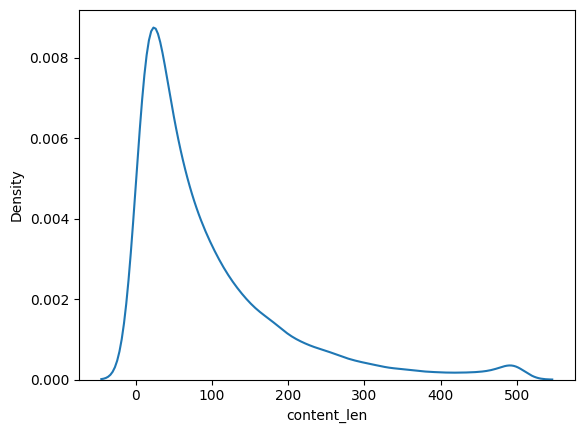

In [48]:
# distribution of content length
sns.kdeplot(data= df_final_play_store, x='content_len')

In [33]:
# export csv file for further process
df_final_play_store.to_csv('df_final_play_store.csv', index=False)

# Data Preprocessing

In [3]:
# read final csv
df_final_play_store = pd.read_csv('/kaggle/input/df-final-play-store/df_final_play_store.csv')
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store
2,Keeren,5,shopee-express,google-play-store
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee-express,google-play-store


## Labeling sentiment using simple logic

In [8]:
# define correct map_sentimen function
def map_sentimen(score):
    if score == 1:
        return 'negative'
    elif score == 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

In [9]:
# Apply the lambda function to create a new column 'Category'
df_final_play_store['kategori_sentimen_mapping'] = df_final_play_store['score'].apply(map_sentimen)

# Display the DataFrame
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative
2,Keeren,5,shopee-express,google-play-store,positive
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee-express,google-play-store,positive


In [10]:
df_final_play_store['kategori_sentimen_mapping'].value_counts()

kategori_sentimen_mapping
negative    5859
positive    5584
neutral      420
Name: count, dtype: int64

## Labeling sentiment using INDOBERT + Doing Data Preprocessing

### Preparing libraries

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import emoji
import re
import html

pretrained_id = "mdhugol/indonesia-bert-sentiment-classification"
label_id = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

In [11]:
!pip install sastrawi -q
!pip install emoji -q
!pip install transformers -q

In [68]:
!pip install indonlu

ERROR: Could not find a version that satisfies the requirement indonlu (from versions: none)
ERROR: No matching distribution found for indonlu


In [12]:
# NLP
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import emoji

# Visualization
from wordcloud import WordCloud

#Model IndoBERT
import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
#from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
#from indonlu.utils.forward_fn import forward_sequence_classification
#from indonlu.utils.metrics import document_sentiment_metrics_fn

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Preprocessing phase 1

In [13]:
character = ['.',',',';',':','-,','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','-','@',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# delete redundant char
def repeatcharClean(text):
    for i in range(len(character)):
        charac_long = 5
        while charac_long > 2:
            char = character[i]*charac_long 
            text = text.replace(char,character[i])
            charac_long -= 1
    return text

In [14]:
def clean_review(text):
    # lowercase text
    text = text.lower()
    # change enter to space
    text = re.sub(r'\n', ' ', text)
    # delete emoji
    text = emoji.demojize(text)
    text = re.sub(':[A-Za-z_-]+:', ' ', text) # delete emoji
    # delete emoticon
    text = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', text)
    # delete link
    text = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", text)
    # delete username
    text = re.sub(r"@[^\s]+[\s]?", ' ', text)
    # delete hashtag
    text = re.sub(r'#(\S+)', r'\1', text)
    # delete number and some symbol
    text = re.sub('[^a-zA-Z,.?!]+',' ',text)
    # delete redundant char
    text = repeatcharClean(text)
    # clear spasi
    text = re.sub('[ ]+',' ',text)
    return text

In [15]:
df_final_play_store['content_preprocessed'] = df_final_play_store['content'].apply(clean_review)
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,saya sangat kecewa dengan para pelanggan spx e...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang satu dulu tunggu barang sampai moga ku...
2,Keeren,5,shopee-express,google-play-store,positive,keeren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus sekarang sudah lumayan ada peningkatan ok
4,🙏👍🙏👍🙏👍👍👍👍,5,shopee-express,google-play-store,positive,


In [17]:
# approach 2 >> succeed
#remove null value
df_final_play_store = df_final_play_store[df_final_play_store["content_preprocessed"]!=" "]
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,saya sangat kecewa dengan para pelanggan spx e...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang satu dulu tunggu barang sampai moga ku...
2,Keeren,5,shopee-express,google-play-store,positive,keeren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus sekarang sudah lumayan ada peningkatan ok
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,sebaiknya di cantum kan nama dan no hp driver ...


In [18]:
df_final_play_store.shape

(11782, 6)

### preprocessing phase 2

In [38]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# default stopwords
default_stopwords = list(stopwords.words('indonesian'))
# default_stopwords = StopWordRemoverFactory().get_stop_words()
# default_stopwords = set(stopwords.words('indonesian'))

# additional stopwords
more_stopwords = ["yg", "utk", 'cuman', 'deh', 'Btw', 'btw', 'tapi', 'tp', 'gua', 'gue', 'gw', 'lo', 'lu', 'kalo', 'kl', 'trs', 'jd', 'nih', 'nich', 'ntar',
                  "nya", '1g', 'gk', 'ecusli', 'dpt', 'dr', 'kpn', 'kok', 'kyk', 'donk', 'dong', 'yah', 'u', 'ya', 'ga', 'km', 'eh', 'sih',
                  'en', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', ' ,', ', ',
                  'sm', "usah", 'mas', 'sob', 'thx', 'ato', 'jg', 'g', 'kuk', 'mak', 'haha', 'ly' 'tp', 'haha', 'dg', 'dri', 'udh',
                  'duh', 'ye', 'wkwkwk', 'syg', 'btw', 'nerjemahin',
                  'gaes', 'guys', "moga", 'kmrn', 'nemu', "yukkk", 'wkwkw', 'klas', 'iw', 'ew', 'lho', 'loh', 'sbnry', 'org', 'gtu', 'bwt',
                  'klrga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'mas', 'sdh', 'kann', 'ol', 'spt', 'dim', 'bs', 'krn', 'jgn',
                  'sapa', 'spt', 'sh', "wakakaka", 'sihhh', 'hehe', 'ini', 'dgn', 'la', "kl", 'ttg', 'mana', 'kmna', 'kmn', 'tdk',
                  'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'bruh', 'bro', 'bre', 'ok', 'okay', 'okei', 'okok',
                  'mah', 'dhhh', 'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii',
                  'cm', 'sy', 'hahahaha', 'weh', 'dlu', 'tuhh', 'tgl', 'aja',
                  'yg', 'bgt', 'blm', 'dah', 'gak', 'po', 'klo', 'dah', 'deh', 'bgst']

# combine all stopword
list_stopwords = []
list_stopwords = default_stopwords + more_stopwords

def remove_stop_words(text):
    # split the text into words
    words = text.split()
    # filter out words with less than 2 characters
    words = [word for word in words if len(word) > 2]
    tokens_without_stopword = [word for word in words if not word in list_stopwords]
    # join the remaining words into a string
    text = ' '.join(tokens_without_stopword)
    return text

In [31]:
df_final_play_store['content_preprocessed'] = df_final_play_store['content_preprocessed'].apply(remove_stop_words)
df_final_play_store.head()

/tmp/ipykernel_27/817307032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_play_store['content_preprocessed'] = df_final_play_store['content_preprocessed'].apply(remove_stop_words)


,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet
2,Keeren,5,shopee-express,google-play-store,positive,keeren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men..."


In [32]:
kamus_alay = pd.read_csv('/kaggle/input/kamus-alay-v1/kamus_alay.csv') 

normalize_word_dict = {}
for index, row in kamus_alay.iterrows():
    if row[0] not in normalize_word_dict:
        normalize_word_dict[row[0]] = row[1]

In [33]:
def normalize_review(text):
    # tokenize
    list_text = word_tokenize(text)
    # ubah bahasa alay
    list_text = [normalize_word_dict[term] if term in normalize_word_dict else term for term in list_text]
    # gabung kembali kalimat
    text = " ".join(list_text)
    return text

In [34]:
df_final_play_store['content_preprocessed_s3'] = df_final_play_store['content_preprocessed'].apply(normalize_review)
df_final_play_store.head()

/tmp/ipykernel_27/1310646150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_play_store['content_preprocessed_s3'] = df_final_play_store['content_preprocessed'].apply(normalize_review)


,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet
2,Keeren,5,shopee-express,google-play-store,positive,keeren,keren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men...","cantum nama driver mengantar alamat , susah me..."


In [35]:
df_final_play_store.tail()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3
11858,"EKSPEDISI SINTING, DARI JAKSEL KE TANGSEL 7 HA...",1,anteraja,google-play-store,negative,"ekspedisi sinting, jaksel tangsel","ekspedisi sinting , jaksel tangsel"
11859,TIDAK DI ANTAR,1,anteraja,google-play-store,negative,,
11860,Udah tinggal kirim ke alamat rumah yg dituju p...,1,anteraja,google-play-store,negative,udah tinggal kirim alamat rumah dituju pdahal ...,sudah tinggal kirim alamat rumah dituju padaha...
11861,pengiriman ga sesuai estimasi pengiriman lama,1,anteraja,google-play-store,negative,pengiriman sesuai estimasi pengiriman,pengiriman sesuai estimasi pengiriman
11862,Pengiriman lambat estimasi nya 3hr sampe nih s...,1,anteraja,google-play-store,negative,pengiriman lambat estimasi sampe sampe minggu ...,pengiriman lambat estimasi sampai sampai mingg...


### Preprocessing phase 3

In [40]:
def remove_punctuation(text):
    # Define a regex pattern for punctuation
    punctuation_pattern = re.compile(r'[^\w\s]')

    # Use the sub() function to replace punctuation with an empty string
    clean_text = punctuation_pattern.sub('', text)

    return clean_text

In [41]:
df_final_play_store['content_preprocessed_s4'] = df_final_play_store['content_preprocessed_s3'].apply(remove_punctuation)
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet
2,Keeren,5,shopee-express,google-play-store,positive,keeren,keren,[keren],keren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men...","cantum nama driver mengantar alamat , susah me...","[cantum, nama, driver, mengantar, alamat, ,, s...",cantum nama driver mengantar alamat susah men...


In [49]:
# remove rows with ' ' value in content_preprocessed_s4
df_final_play_store = df_final_play_store[(df_final_play_store["content_preprocessed_s4"]!=" ") & (df_final_play_store["content_preprocessed_s4"]!="")]
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4,content_prepocess_tokenized_v2
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik..."
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]"
2,Keeren,5,shopee-express,google-play-store,positive,keeren,keren,[keren],keren,[keren]
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]"
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men...","cantum nama driver mengantar alamat , susah me...","[cantum, nama, driver, mengantar, alamat, ,, s...",cantum nama driver mengantar alamat susah men...,"[cantum, nama, driver, mengantar, alamat, susa..."


In [50]:
df_final_play_store.tail()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4,content_prepocess_tokenized_v2
11857,"Paket pick up tidak di ambil berhari hari, kal...",1,anteraja,google-play-store,negative,"paket pick ambil berhari hari, sanggup pick ad...","paket pick ambil berhari hari , sanggup pick a...","[paket, pick, ambil, berhari, ,, sanggup, pick...",paket pick ambil berhari hari sanggup pick ad...,"[paket, pick, ambil, berhari, sanggup, pick, a..."
11858,"EKSPEDISI SINTING, DARI JAKSEL KE TANGSEL 7 HA...",1,anteraja,google-play-store,negative,"ekspedisi sinting, jaksel tangsel","ekspedisi sinting , jaksel tangsel","[ekspedisi, sinting, ,, jaksel, tangsel]",ekspedisi sinting jaksel tangsel,"[ekspedisi, sinting, jaksel, tangsel]"
11860,Udah tinggal kirim ke alamat rumah yg dituju p...,1,anteraja,google-play-store,negative,udah tinggal kirim alamat rumah dituju pdahal ...,sudah tinggal kirim alamat rumah dituju padaha...,"[tinggal, kirim, alamat, rumah, dituju, ,, gil...",sudah tinggal kirim alamat rumah dituju padaha...,"[tinggal, kirim, alamat, rumah, dituju, gilee,..."
11861,pengiriman ga sesuai estimasi pengiriman lama,1,anteraja,google-play-store,negative,pengiriman sesuai estimasi pengiriman,pengiriman sesuai estimasi pengiriman,"[pengiriman, sesuai, estimasi, pengiriman]",pengiriman sesuai estimasi pengiriman,"[pengiriman, sesuai, estimasi, pengiriman]"
11862,Pengiriman lambat estimasi nya 3hr sampe nih s...,1,anteraja,google-play-store,negative,pengiriman lambat estimasi sampe sampe minggu ...,pengiriman lambat estimasi sampai sampai mingg...,"[pengiriman, lambat, estimasi, minggu, stuck, ...",pengiriman lambat estimasi sampai sampai mingg...,"[pengiriman, lambat, estimasi, minggu, stuck, ..."


In [51]:
df_final_play_store.shape #previously: 11782

(11633, 10)

### Tokenizer and Stemming

In [44]:
#word tokenizing
def tokenize(sentence):
    return [token for token in sentence.split() if token not in list_stopwords]

In [52]:
# tokenizer
df_final_play_store['content_prepocess_tokenized_v2'] = df_final_play_store['content_preprocessed_s4'].apply(tokenize)
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4,content_prepocess_tokenized_v2
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik..."
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]"
2,Keeren,5,shopee-express,google-play-store,positive,keeren,keren,[keren],keren,[keren]
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]"
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men...","cantum nama driver mengantar alamat , susah me...","[cantum, nama, driver, mengantar, alamat, ,, s...",cantum nama driver mengantar alamat susah men...,"[cantum, nama, driver, mengantar, alamat, susa..."


In [53]:
df_final_play_store.tail()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4,content_prepocess_tokenized_v2
11857,"Paket pick up tidak di ambil berhari hari, kal...",1,anteraja,google-play-store,negative,"paket pick ambil berhari hari, sanggup pick ad...","paket pick ambil berhari hari , sanggup pick a...","[paket, pick, ambil, berhari, ,, sanggup, pick...",paket pick ambil berhari hari sanggup pick ad...,"[paket, pick, ambil, berhari, sanggup, pick, a..."
11858,"EKSPEDISI SINTING, DARI JAKSEL KE TANGSEL 7 HA...",1,anteraja,google-play-store,negative,"ekspedisi sinting, jaksel tangsel","ekspedisi sinting , jaksel tangsel","[ekspedisi, sinting, ,, jaksel, tangsel]",ekspedisi sinting jaksel tangsel,"[ekspedisi, sinting, jaksel, tangsel]"
11860,Udah tinggal kirim ke alamat rumah yg dituju p...,1,anteraja,google-play-store,negative,udah tinggal kirim alamat rumah dituju pdahal ...,sudah tinggal kirim alamat rumah dituju padaha...,"[tinggal, kirim, alamat, rumah, dituju, ,, gil...",sudah tinggal kirim alamat rumah dituju padaha...,"[tinggal, kirim, alamat, rumah, dituju, gilee,..."
11861,pengiriman ga sesuai estimasi pengiriman lama,1,anteraja,google-play-store,negative,pengiriman sesuai estimasi pengiriman,pengiriman sesuai estimasi pengiriman,"[pengiriman, sesuai, estimasi, pengiriman]",pengiriman sesuai estimasi pengiriman,"[pengiriman, sesuai, estimasi, pengiriman]"
11862,Pengiriman lambat estimasi nya 3hr sampe nih s...,1,anteraja,google-play-store,negative,pengiriman lambat estimasi sampe sampe minggu ...,pengiriman lambat estimasi sampai sampai mingg...,"[pengiriman, lambat, estimasi, minggu, stuck, ...",pengiriman lambat estimasi sampai sampai mingg...,"[pengiriman, lambat, estimasi, minggu, stuck, ..."


In [54]:
df_final_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11633 entries, 0 to 11862
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   content                         11633 non-null  object
 1   score                           11633 non-null  int64 
 2   jenis_ekspedisi                 11633 non-null  object
 3   media_scraping                  11633 non-null  object
 4   kategori_sentimen_mapping       11633 non-null  object
 5   content_preprocessed            11633 non-null  object
 6   content_preprocessed_s3         11633 non-null  object
 7   content_prepocess_tokenized     11633 non-null  object
 8   content_preprocessed_s4         11633 non-null  object
 9   content_prepocess_tokenized_v2  11633 non-null  object
dtypes: int64(1), object(9)
memory usage: 999.7+ KB


In [55]:
# export csv
df_cleaned_notyed_stemmed = df_final_play_store.copy()
df_cleaned_notyed_stemmed = df_final_play_store.drop(columns=[
    'content_preprocessed', 'content_preprocessed_s3', 'content_prepocess_tokenized'], axis=1)
df_cleaned_notyed_stemmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11633 entries, 0 to 11862
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   content                         11633 non-null  object
 1   score                           11633 non-null  int64 
 2   jenis_ekspedisi                 11633 non-null  object
 3   media_scraping                  11633 non-null  object
 4   kategori_sentimen_mapping       11633 non-null  object
 5   content_preprocessed_s3         11633 non-null  object
 6   content_preprocessed_s4         11633 non-null  object
 7   content_prepocess_tokenized_v2  11633 non-null  object
dtypes: int64(1), object(7)
memory usage: 817.9+ KB


In [77]:
df_cleaned_notyed_stemmed.to_csv('df_cleaned_notyed_stemmed.csv', index=False)

In [57]:
df_cleaned_notyed_stemmed.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed_s3,content_preprocessed_s4,content_prepocess_tokenized_v2
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik..."
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]"
2,Keeren,5,shopee-express,google-play-store,positive,keren,keren,[keren]
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]"
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat , susah me...",cantum nama driver mengantar alamat susah men...,"[cantum, nama, driver, mengantar, alamat, susa..."


In [58]:
# join the token for each reviews, rather than in the form of a single block of text.

df_final_play_store['notyet_stemmed'] = df_final_play_store['content_prepocess_tokenized_v2'].str.join(' ')
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4,content_prepocess_tokenized_v2,notyet_stemmed
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet
2,Keeren,5,shopee-express,google-play-store,positive,keeren,keren,[keren],keren,[keren],keren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men...","cantum nama driver mengantar alamat , susah me...","[cantum, nama, driver, mengantar, alamat, ,, s...",cantum nama driver mengantar alamat susah men...,"[cantum, nama, driver, mengantar, alamat, susa...",cantum nama driver mengantar alamat susah menc...


### curious data visualization

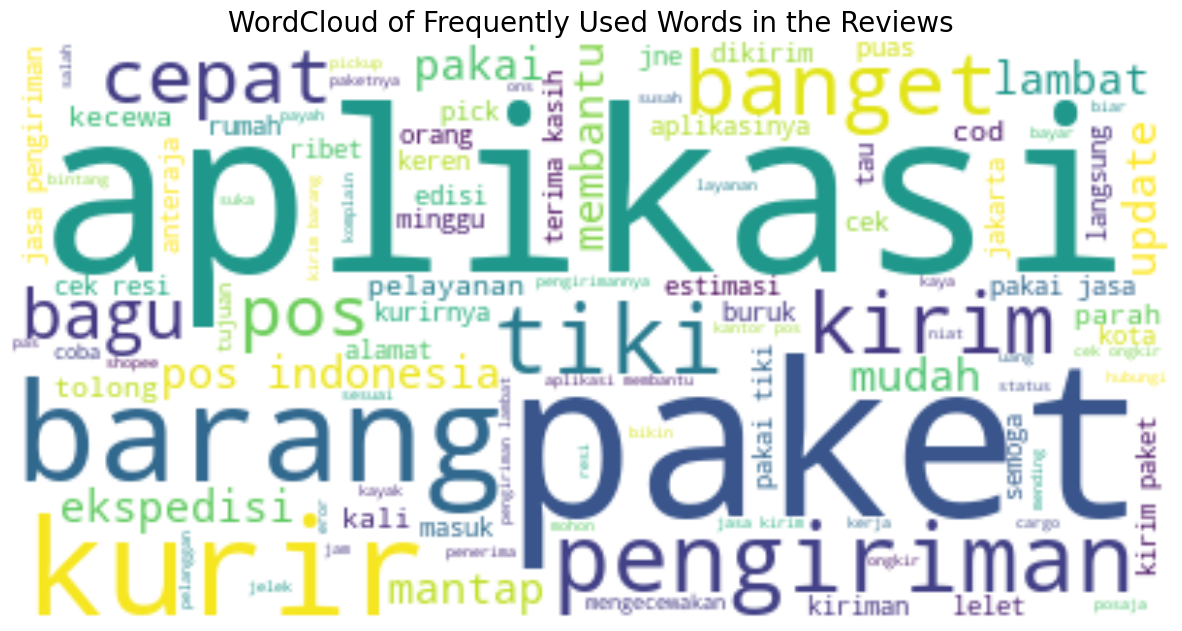

In [64]:
# word cloud visualization for reciews
all_pos_text = ' '.join(df_final_play_store['notyet_stemmed'].tolist())
word_cloud_1 = WordCloud(max_words=100, random_state=100, background_color="white").generate(all_pos_text)

plt.figure(figsize=(15, 10))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in the Reviews', fontsize=20)
plt.axis("off")
plt.savefig('wordcloud_v2.png')
plt.show()

In [67]:
word_cloud_1.words_

{'aplikasi': 1.0,
 'paket': 0.9006928406466512,
 'barang': 0.6651270207852193,
 'kurir': 0.6304849884526559,
 'pengiriman': 0.6143187066974596,
 'tiki': 0.613548883756736,
 'banget': 0.5042340261739799,
 'kirim': 0.4541955350269438,
 'cepat': 0.38645111624326406,
 'pos': 0.34103156274056967,
 'bagu': 0.3140877598152425,
 'pos indonesia': 0.30331023864511164,
 'mantap': 0.29869130100076985,
 'ekspedisi': 0.2979214780600462,
 'pakai': 0.2979214780600462,
 'mudah': 0.28329484218629714,
 'lambat': 0.2825250192455735,
 'update': 0.27174749807544263,
 'membantu': 0.25635103926096997,
 'pelayanan': 0.25635103926096997,
 'parah': 0.2548113933795227,
 'tolong': 0.2340261739799846,
 'kecewa': 0.2270977675134719,
 'cod': 0.21862971516551194,
 'kali': 0.21170130869899922,
 'aplikasinya': 0.1901462663587375,
 'edisi': 0.18937644341801385,
 'pakai jasa': 0.1855273287143957,
 'rumah': 0.18398768283294842,
 'ribet': 0.18013856812933027,
 'alamat': 0.17936874518860663,
 'kurirnya': 0.1762894534257121,


In [68]:
# let's see the top 100 word after we preprocessed it
# calculate frequency of the word in processed column
freq_words_prc = df_final_play_store['notyet_stemmed'].str.split(expand=True).stack().value_counts()

In [76]:
freq_words_prc[:50]

paket          1950
aplikasi       1931
pengiriman     1833
pos            1575
pakai          1561
barang         1405
tiki           1160
kirim          1145
kurir          1008
banget          982
membantu        881
cepat           788
jasa            764
bagus           752
cek             701
mantap          652
ekspedisi       616
lambat          571
mudah           564
cod             561
pelayanan       540
indonesia       525
tolong          445
kasih           434
buruk           433
alamat          429
update          413
parah           411
kecewa          398
resi            389
ongkir          371
edisi           351
kali            346
aplikasinya     346
kota            332
kiriman         321
semoga          311
terima          307
estimasi        305
lelet           303
online          303
masuk           303
tujuan          300
kurirnya        297
bintang         290
jne             289
mending         284
dikirim         281
keren           280
kantor          277


In [75]:
# visualize top 50 words in treemap
#freq_words_prc_top50 = freq_words_prc[:50]

#fig = px.treemap(freq_words_prc_top50, path=[freq_words_prc_top50.index], values=0)
#fig.update_layout(title_text='Most Frequent 50 Words in the processed dataset', title_font=dict(size=20), uniformtext=dict(minsize=25, mode='show'))
#fig.show()

### shall we preprocess it again?

In [ ]:
#cleanse data
def cleanse(text):
    text = unescape(text)
    text = re.sub(r"\b\d{1,3}\b", ".", text)
    text = re.sub(r"\b[a-zA-Z]\b", ".", text)
    text = re.sub(r"tiki", "", text)
    text = re.sub(r"jne", "", text)
    text = re.sub(r"jnt", "", text)
    text = re.sub(r"spx", "", text)
    text = re.sub(r"ekspedisi", "", text)
    text = re.sub(r"com", "", text)
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    return ' '.join(text.split())

### stemming

In [78]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    return text

In [79]:
# stemming
df_final_play_store['content_prepocess_stemming'] = df_final_play_store['content_preprocessed_s4'].apply(stemming)
df_final_play_store.head()

,content,score,jenis_ekspedisi,media_scraping,kategori_sentimen_mapping,content_preprocessed,content_preprocessed_s3,content_prepocess_tokenized,content_preprocessed_s4,content_prepocess_tokenized_v2,notyet_stemmed,content_prepocess_stemming
0,Saya sangat kecewa dengan para pelanggan spx e...,5,shopee-express,google-play-store,positive,kecewa pelanggan spx ress complain aplikasi ap...,kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...,"[kecewa, pelanggan, spx, ress, complain, aplik...",kecewa pelanggan spx ress complain aplikasi ap...,kecewa langgan spx ress complain aplikasi apli...
1,Bintang satu dulu tunggu barang sampai moga ku...,1,shopee-express,google-play-store,negative,bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet,"[bintang, tunggu, barang, kurir, lelet]",bintang tunggu barang kurir lelet,bintang tunggu barang kurir lelet
2,Keeren,5,shopee-express,google-play-store,positive,keeren,keren,[keren],keren,[keren],keren,keren
3,bagus sekarang sudah lumayan ada peningkatan o...,5,shopee-express,google-play-store,positive,bagus lumayan peningkatan,bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan,"[bagus, lumayan, peningkatan]",bagus lumayan peningkatan,bagus lumayan tingkat
5,Sebaiknya di cantum kan nama dan no HP driver ...,2,shopee-express,google-play-store,negative,"cantum nama driver mengantar alamat, susah men...","cantum nama driver mengantar alamat , susah me...","[cantum, nama, driver, mengantar, alamat, ,, s...",cantum nama driver mengantar alamat susah men...,"[cantum, nama, driver, mengantar, alamat, susa...",cantum nama driver mengantar alamat susah menc...,cantum nama driver antar alamat susah mencarit...


In [80]:
df_final_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11633 entries, 0 to 11862
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   content                         11633 non-null  object
 1   score                           11633 non-null  int64 
 2   jenis_ekspedisi                 11633 non-null  object
 3   media_scraping                  11633 non-null  object
 4   kategori_sentimen_mapping       11633 non-null  object
 5   content_preprocessed            11633 non-null  object
 6   content_preprocessed_s3         11633 non-null  object
 7   content_prepocess_tokenized     11633 non-null  object
 8   content_preprocessed_s4         11633 non-null  object
 9   content_prepocess_tokenized_v2  11633 non-null  object
 10  notyet_stemmed                  11633 non-null  object
 11  content_prepocess_stemming      11633 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


In [81]:
df = df_final_play_store.copy()
df = df.drop(columns=['content_preprocessed',  'content_preprocessed_s3', 'content_prepocess_tokenized'], axis=1)
df_final_play_store.to_csv('df_cleaned_stemmed.csv', index=False)

In [82]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_id)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_id)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [83]:
bacaan = []
label = []
nilai = []

for i in range(0,len(df_final_play_store['content_prepocess_stemming'])):
    text = df_final_play_store['content_prepocess_stemming'].iloc[i]
    result = sentiment_analysis(text)
    status = label_id[result[0]['label']]
    score = result[0]['score']
    bacaan.append(text)
    label.append(status)
    nilai.append(score)
    
df_hasil = pd.DataFrame({'Text':bacaan,'status':label,'score':nilai})
df_hasil

,Text,status,score
0,kecewa langgan spx ress complain aplikasi apli...,negative,0.994005
1,bintang tunggu barang kurir lelet,negative,0.996217
2,keren,positive,0.997158
3,bagus lumayan tingkat,positive,0.991721
4,cantum nama driver antar alamat susah mencarit...,negative,0.668219
...,...,...,...
11628,paket pick ambil hari hari sanggup pick adakan...,neutral,0.994453
11629,ekspedisi sinting jaksel tangsel,neutral,0.913907
11630,sudah tinggal kirim alamat rumah tuju padahal ...,negative,0.996672
11631,kirim sesuai estimasi kirim,neutral,0.985968


In [86]:
df_hasil.status.value_counts()

status
negative    4705
positive    4520
neutral     2408
Name: count, dtype: int64

In [84]:
df_hasil.to_csv('df_final_play_store_with_indobert_label.csv', index=False)